In [375]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
df=pd.read_csv("Movie.csv")

In [376]:
df.columns

Index(['Unnamed: 0', 'ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type', 'Directors',
       'Genres', 'Country', 'Language', 'Runtime'],
      dtype='object')

In [377]:
df.Genres.unique()


array(['Action,Adventure,Sci-Fi,Thriller', 'Action,Sci-Fi',
       'Action,Adventure,Sci-Fi', ..., 'Comedy,Family,Fantasy,Mystery',
       'Family,Drama,Western', 'Comedy,Family,Adventure,Fantasy,Sci-Fi'],
      dtype=object)

In [378]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [379]:
df.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [380]:
from pandas_profiling import ProfileReport
report=ProfileReport(df)
report.to_file("report.html")

In [381]:
df.isnull().sum()

ID                     0
Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            726
Genres               275
Country              435
Language             599
Runtime              592
dtype: int64

In [382]:
df["Age"].fillna(0,inplace=True)
df["Rotten Tomatoes"].fillna(0,inplace=True)

In [383]:
df.dropna(inplace=True)

In [384]:
import re
def convert_1(data):
    if data != "NA":
        d=int(re.sub("%","",str(data).strip()))
        if d in range(0,40):
            return "Bad"
        if d in range(40,60):
            return "Average"
        if d in range(60,80):
            return "Good"
        if d in range(80,100):
            return "Really_Good"
    else:
        return "NA"

In [385]:
df["Rotten Tomatoes"]=df["Rotten Tomatoes"].apply(convert_1)

In [386]:
df["IMDb"].describe()

count    15233.000000
mean         5.899580
std          1.343047
min          0.000000
25%          5.100000
50%          6.100000
75%          6.900000
max          9.300000
Name: IMDb, dtype: float64

In [387]:
def convert_2(data):
    if data>=0.0 and data<=3.5:
        return'Really_Bad'
    if data>=3.6 and data<=5.0:
        return 'Bad'
    if data>=5.1 and data<=6.5:
        return 'Average'
    if data>=6.5 and data<=7.9:
        return'Good'
    if data>=8.0 and data<=10: 
        return'Really_Good'

In [388]:
df["IMDb"]=df["IMDb"].apply(convert_2)

In [389]:
df.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,Really_Good,Really_Good,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,Really_Good,Really_Good,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,Really_Good,Really_Good,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,Really_Good,Really_Good,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,Really_Good,Really_Good,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


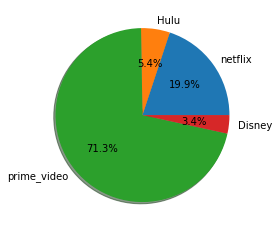

In [390]:
netflix=df[df["Netflix"]==1]["Netflix"].sum()
Hulu=df[df["Hulu"]==1]["Hulu"].sum()
prime_video=df[df["Prime Video"]==1]["Prime Video"].sum()
Disney=df[df["Disney+"]==1]["Disney+"].sum()
plt.pie([netflix,Hulu,prime_video,Disney],labels=['netflix','Hulu','prime_video','Disney'],autopct='%1.1f%%',shadow=True)
plt.show()

In [391]:
def convertAge(age):
    if age!='NA':
        if age=='18+':
            return 'Adult'
        elif age=='13+' or age=='16+':
            return 'Teen'
        else:
            return 'Non-Adult'
    else:
        return age

In [392]:
df["Age"]=df["Age"].apply(convertAge)

In [393]:
df.head()


,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,Teen,Really_Good,Really_Good,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,Adult,Really_Good,Really_Good,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,Teen,Really_Good,Really_Good,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,Non-Adult,Really_Good,Really_Good,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,Adult,Really_Good,Really_Good,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


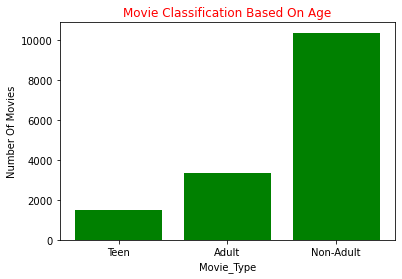

In [458]:
types=df["Age"].unique()
count=[]
for type in types:
    count.append(df[df["Age"]==type]["Age"].count())

plt.bar(types,count,color='g')
plt.title("Movie Classification Based On Age",color="r")
plt.xlabel("Movie_Type")
plt.ylabel("Number Of Movies")
plt.show()

    

In [394]:
genre=df["Genres"]
lang=df["Language"]


In [395]:
dec={}
def conut_cat(data):
    data=data.split(",")
    for cat in data:
        if cat not in dec:
            dec[cat]=1
        else:
            dec[cat]=dec[cat]+1
    
    
    

In [396]:
genre.apply(conut_cat)

0        None
1        None
2        None
3        None
4        None
         ... 
16734    None
16737    None
16738    None
16739    None
16740    None
Name: Genres, Length: 15233, dtype: object

In [397]:
dec

{'Action': 2566,
 'Adventure': 1691,
 'Sci-Fi': 1167,
 'Thriller': 3197,
 'Comedy': 4336,
 'Western': 483,
 'Animation': 628,
 'Family': 1408,
 'Biography': 785,
 'Drama': 6828,
 'Music': 614,
 'War': 517,
 'Crime': 1728,
 'Fantasy': 1012,
 'Romance': 2265,
 'History': 671,
 'Mystery': 1180,
 'Horror': 2135,
 'Sport': 376,
 'Documentary': 2233,
 'Musical': 387,
 'News': 96,
 'Short': 290,
 'Reality-TV': 5,
 'Film-Noir': 79,
 'Talk-Show': 1}

In [398]:
d={'Action':[],'Adventure':[],'Thriller':[],'Comedy':[],'Family':[],'Drama':[],'Crime':[],'Romance':[],'Horror':[],'Documentary':[],'other':[]}
def convert_cat(data):
    data=data.split(",")
    if any([dat not in d for dat in data] ):
        d['other']=d['other']+[1]
    else:
        d['other']=d['other']+[0]
    for cat,l in d.items():
        if cat in data:
            d[cat]=l+[1]
        if cat not in data and cat !='other':
            d[cat]=l+[0]
    

In [399]:
genre.apply(convert_cat)

0        None
1        None
2        None
3        None
4        None
         ... 
16734    None
16737    None
16738    None
16739    None
16740    None
Name: Genres, Length: 15233, dtype: object

In [400]:
len(d["Action"])

15233

In [401]:
genre_df=pd.DataFrame(d)

In [402]:
genre_df.head()

,Action,Adventure,Thriller,Comedy,Family,Drama,Crime,Romance,Horror,Documentary,other
0,1,1,1,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,1
2,1,1,0,0,0,0,0,0,0,0,1
3,0,1,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,1


In [403]:
df.shape

(15233, 16)

In [404]:
genre_df.shape

(15233, 11)

In [405]:
dec2={}
def conut_cat2(data):
    data=data.split(",")
    for cat in data:
        if cat not in dec2:
            dec2[cat]=1
        else:
            dec2[cat]=dec2[cat]+1

In [406]:
lang.apply(conut_cat2)

0        None
1        None
2        None
3        None
4        None
         ... 
16734    None
16737    None
16738    None
16739    None
16740    None
Name: Language, Length: 15233, dtype: object

In [407]:
d={'English':[],'French':[],'Spanish':[],'Hindi':[],'other':[]}
def convert_cat2(data):
    data=data.split(",")
    if any([dat not in d for dat in data] ):
        d['other']=d['other']+[1]
    else:
        d['other']=d['other']+[0]
    for cat,l in d.items():
        if cat in data:
            d[cat]=l+[1]
        if cat not in data and cat !='other':
            d[cat]=l+[0]

In [408]:
lang.apply(convert_cat2)

0        None
1        None
2        None
3        None
4        None
         ... 
16734    None
16737    None
16738    None
16739    None
16740    None
Name: Language, Length: 15233, dtype: object

In [409]:
len(d["English"])

15233

In [410]:
lang_df=pd.DataFrame(d)

In [411]:
lang_df.head()

,English,French,Spanish,Hindi,other
0,1,1,0,0,1
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,0,0,0,1


In [412]:
lang_df.rename({'other':"other_lang"},axis="columns",inplace=True)

In [413]:
lang_df.head()

,English,French,Spanish,Hindi,other_lang
0,1,1,0,0,1
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,0,0,0,1


In [414]:
lang_df.shape

(15233, 5)

In [415]:
df2.shape

(16321, 26)

In [416]:
df.shape

(15233, 16)

In [417]:
df3=pd.concat([df,genre_df,lang_df],axis=1)

In [418]:
df3.shape

(16320, 32)

In [419]:
df3.rename({"other":"other_type"},axis="columns",inplace=True)

In [420]:
df3.isnull().sum()

ID                 1087
Title              1087
Year               1087
Age                1087
IMDb               1087
Rotten Tomatoes    1471
Netflix            1087
Hulu               1087
Prime Video        1087
Disney+            1087
Type               1087
Directors          1087
Genres             1087
Country            1087
Language           1087
Runtime            1087
Action             1087
Adventure          1087
Thriller           1087
Comedy             1087
Family             1087
Drama              1087
Crime              1087
Romance            1087
Horror             1087
Documentary        1087
other_type         1087
English            1087
French             1087
Spanish            1087
Hindi              1087
other_lang         1087
dtype: int64

In [421]:
df3.dropna(inplace=True)

In [422]:
df3.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,...,Crime,Romance,Horror,Documentary,other_type,English,French,Spanish,Hindi,other_lang
0,1.0,Inception,2010.0,Teen,Really_Good,Really_Good,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
1,2.0,The Matrix,1999.0,Adult,Really_Good,Really_Good,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,3.0,Avengers: Infinity War,2018.0,Teen,Really_Good,Really_Good,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,4.0,Back to the Future,1985.0,Non-Adult,Really_Good,Really_Good,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,5.0,"The Good, the Bad and the Ugly",1966.0,Adult,Really_Good,Really_Good,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [423]:
df3.columns

Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix',
       'Hulu', 'Prime Video', 'Disney+', 'Type', 'Directors', 'Genres',
       'Country', 'Language', 'Runtime', 'Action', 'Adventure', 'Thriller',
       'Comedy', 'Family', 'Drama', 'Crime', 'Romance', 'Horror',
       'Documentary', 'other_type', 'English', 'French', 'Spanish', 'Hindi',
       'other_lang'],
      dtype='object')

In [424]:
df4=df3.drop(["Genres","Language"],axis=1)

In [425]:
df4.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,...,Crime,Romance,Horror,Documentary,other_type,English,French,Spanish,Hindi,other_lang
0,1.0,Inception,2010.0,Teen,Really_Good,Really_Good,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
1,2.0,The Matrix,1999.0,Adult,Really_Good,Really_Good,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,3.0,Avengers: Infinity War,2018.0,Teen,Really_Good,Really_Good,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,4.0,Back to the Future,1985.0,Non-Adult,Really_Good,Really_Good,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,5.0,"The Good, the Bad and the Ugly",1966.0,Adult,Really_Good,Really_Good,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [426]:
def yearConvert(year):
    if year<=1940:
        return 'Old'
    elif year<=1970:
        return 'Vintage'
    elif year<=1990:
        return 'Golden'
    elif year<=2010:
        return 'Modern'
    else:
        return 'Latest'

In [427]:
df["Year"]=df["Year"].apply(yearConvert)

In [428]:
dec2={}
def conut_cat2(data):
    data=data.split(",")
    for cat in data:
        if cat not in dec2:
            dec2[cat]=1
        else:
            dec2[cat]=dec2[cat]+1

In [429]:
country=df['Country']

In [430]:
country.apply(conut_cat2)

0        None
1        None
2        None
3        None
4        None
         ... 
16734    None
16737    None
16738    None
16739    None
16740    None
Name: Country, Length: 15233, dtype: object

In [431]:
d={'United States':[],'United Kingdom':[],'India':[],'Canada':[],'other':[]}
def convert_cat(data):
    data=data.split(",")
    if any([dat not in d for dat in data] ):
        d['other']=d['other']+[1]
    else:
        d['other']=d['other']+[0]
    for cat,l in d.items():
        if cat in data:
            d[cat]=l+[1]
        if cat not in data and cat !='other':
            d[cat]=l+[0]

In [432]:
country.apply(convert_cat)

0        None
1        None
2        None
3        None
4        None
         ... 
16734    None
16737    None
16738    None
16739    None
16740    None
Name: Country, Length: 15233, dtype: object

In [433]:
country_df=pd.DataFrame(d)

In [434]:
df5=pd.concat([df,genre_df,lang_df,country_df],axis=1)

In [435]:
df5.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,...,English,French,Spanish,Hindi,other_lang,United States,United Kingdom,India,Canada,other
0,1.0,Inception,Modern,Teen,Really_Good,Really_Good,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
1,2.0,The Matrix,Modern,Adult,Really_Good,Really_Good,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3.0,Avengers: Infinity War,Latest,Teen,Really_Good,Really_Good,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4.0,Back to the Future,Golden,Non-Adult,Really_Good,Really_Good,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5.0,"The Good, the Bad and the Ugly",Vintage,Adult,Really_Good,Really_Good,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [436]:
country_df.rename({"other":"other_country"},axis=1,inplace=True)

In [437]:
df5=pd.concat([df,genre_df,lang_df,country_df],axis=1)

In [438]:
df5.columns

Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix',
       'Hulu', 'Prime Video', 'Disney+', 'Type', 'Directors', 'Genres',
       'Country', 'Language', 'Runtime', 'Action', 'Adventure', 'Thriller',
       'Comedy', 'Family', 'Drama', 'Crime', 'Romance', 'Horror',
       'Documentary', 'other', 'English', 'French', 'Spanish', 'Hindi',
       'other_lang', 'United States', 'United Kingdom', 'India', 'Canada',
       'other_country'],
      dtype='object')

In [439]:
df5.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,...,English,French,Spanish,Hindi,other_lang,United States,United Kingdom,India,Canada,other_country
0,1.0,Inception,Modern,Teen,Really_Good,Really_Good,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
1,2.0,The Matrix,Modern,Adult,Really_Good,Really_Good,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3.0,Avengers: Infinity War,Latest,Teen,Really_Good,Really_Good,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4.0,Back to the Future,Golden,Non-Adult,Really_Good,Really_Good,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5.0,"The Good, the Bad and the Ugly",Vintage,Adult,Really_Good,Really_Good,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [440]:
df5.dropna(inplace=True)

In [441]:
df5.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,...,English,French,Spanish,Hindi,other_lang,United States,United Kingdom,India,Canada,other_country
0,1.0,Inception,Modern,Teen,Really_Good,Really_Good,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
1,2.0,The Matrix,Modern,Adult,Really_Good,Really_Good,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3.0,Avengers: Infinity War,Latest,Teen,Really_Good,Really_Good,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4.0,Back to the Future,Golden,Non-Adult,Really_Good,Really_Good,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5.0,"The Good, the Bad and the Ugly",Vintage,Adult,Really_Good,Really_Good,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [442]:
df6=df5.drop(["Genres","Language","Country","Runtime"],axis=1)

In [443]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [444]:
count = CountVectorizer(stop_words='english')

In [445]:
count_matrix = count.fit_transform(df7['Title'])

In [446]:
cosine_sim = cosine_similarity(count_matrix)

cosine_sim

In [447]:
dataset=pd.read_csv("Movie.csv")

In [448]:
def get_recommendations_new(title, data, o_data, cosine_sim):
    data = data.reset_index()
    indices = pd.Series(data.index, index=data['Title'])
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]
    movie_indices = [i[0] for i in sim_scores]
    o_data.Genres = o_data.Genres.str.replace(',', '<br>')
    o_data.Directors = o_data.Directors.str.replace(',', '<br>')
    o_data.Country = o_data.Country.str.replace(',', '<br>')
    o_data.Language = o_data.Language.str.replace(',', '<br>')
    return o_data[[
        'Title', 'IMDb', 'Genres', 'Directors', 'Country', 'Language'
    ]].iloc[movie_indices]

In [449]:
recommended = get_recommendations_new('Avengers: Infinity War', df7, dataset, cosine_sim)

In [450]:
import plotly.figure_factory as ff

In [451]:
recommended.sort_values(by='IMDb',ascending=False,inplace=True)
colorscale = [[0, '#477BA8'], [.5, '#C9EEF2'], [1, '#D0F5F5']]
fig = ff.create_table(recommended, colorscale=colorscale, height_constant=70)
fig.show()